In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools

In [10]:
path_exp = "pre_computed_runs/moscot/moscot_sinkhorn_run/"
path_sinkhorn = path_exp + "scores_sinkhorn2023-10-10 01:47:32.json"
with open(path_sinkhorn) as f:
    scores_sinkhorn = json.load(f)
    
path_sinkhorn2 = path_exp + "scores_sinkhorn2023-10-10 10:31:11.json"
with open(path_sinkhorn2) as f:
    scores_sinkhorn2 = json.load(f)
    
path_sinkhorn3 = path_exp + "scores_sinkhorn2023-10-10 11:01:31.json"
with open(path_sinkhorn3) as f:
    scores_sinkhorn3 = json.load(f)
    
scores_sinkhorn.update(scores_sinkhorn2)
scores_sinkhorn.update(scores_sinkhorn3)

In [4]:
subset_sizes = ["25", "50", "100", "250", "500", "1000"]#, "6224"]
epsilons = ['0.005', '0.0005', '0.0001', '5e-05']
seeds = ["0", "1", "2", "3", "4"]
stds_sinkhorn = {}
best_scores_sinkhorn = {}
for subset_size in subset_sizes:
    best_scores_sinkhorn[subset_size] = {}
    for seed in seeds:
        best_scores_sinkhorn[subset_size][seed] = np.min(np.array([scores_sinkhorn[subset_size][seed][eps][0]
                                                              for eps in epsilons]))

best_score_large_sinkhorn = np.min(np.array([scores_sinkhorn["6224"]["0"][eps] for eps in epsilons]))

av_best_scores_sinkhorn = []
for subset in subset_sizes:
    av_best_scores_sinkhorn.append(np.array([best_scores_sinkhorn[subset][seed] for seed in seeds]).mean())
av_best_scores_sinkhorn.append(best_score_large_sinkhorn)

In [5]:
path_exp = "pre_computed_runs/moscot/moscot_lr_run/"

path_lr = path_exp + "scores_lr2023-10-09 22:53:32.json"
with open(path_lr) as f:
    scores_lr = json.load(f)
    
path_lr2 = path_exp + "scores_lr2023-10-10 11:02:46.json"
with open(path_lr2) as f:
    scores_lr2 = json.load(f)
    
scores_lr.update(scores_lr2)

In [6]:
subset_sizes = ["25", "50", "100", "250", "500", "1000"]#, "6224"]
epsilons = ['0.005','0.001', '0.0005', '0.0001', '5e-05']
seeds = ["0", "1", "2", "3", "4"]
ranks = ["6", "7", "11"]
best_scores_lr = {}
for subset_size in subset_sizes:
    best_scores_lr[subset_size] = {}
    for seed in seeds:
        best_scores_lr[subset_size][seed] = {}
        for rank in ranks:
            best_scores_lr[subset_size][seed][rank] = np.min(np.array([scores_lr[subset_size][seed][rank][eps][0]
                                                              for eps in epsilons]))
        best_scores_lr[subset_size][seed] = np.min(np.array([best_scores_lr[subset_size][seed][rank]
                                                              for rank in ranks]))

best_scores_large_lr = {}
for rank in ranks:
    best_scores_large_lr[rank] = np.min(np.array([scores_lr["6224"]["0"][rank][eps][0]
                                                              for eps in epsilons]))
best_scores_large_lr = np.min(np.array([best_scores_large_lr[rank]
                                                      for rank in ranks]))

av_best_scores_lr = []
for subset in subset_sizes:
    av_best_scores_lr.append(np.array([best_scores_lr[subset][seed] for seed in seeds]).mean())
av_best_scores_lr.append(best_scores_large_lr)
av_best_scores_lr = np.array(av_best_scores_lr)

# Test loss

In [7]:
subset_sizes = ["25", "50", "100", "250", "500", "1000"]
epsilons = ['0.005', '0.0005', '0.0001', '5e-05']
seeds = ["0", "1", "2", "3", "4"]
best_scores_sinkhorn = {}
for subset_size in subset_sizes:
    best_scores_sinkhorn[subset_size] = {}
    for seed in seeds:
        best_scores_sinkhorn[subset_size][seed] = np.min(np.array([scores_sinkhorn[subset_size][seed][eps][1]
                                                              for eps in epsilons]))

best_score_large_sinkhorn_test = np.min(np.array([scores_sinkhorn["6224"]["0"][eps] for eps in epsilons]))

av_best_scores_sinkhorn_test = []
for subset in subset_sizes:
    av_best_scores_sinkhorn_test.append(np.array([best_scores_sinkhorn[subset][seed] for seed in seeds]).mean())
av_best_scores_sinkhorn_test.append(best_score_large_sinkhorn_test)

In [8]:
subset_sizes = ["25", "50", "100", "250", "500", "1000"]
epsilons = ['0.005','0.001', '0.0005', '0.0001', '5e-05']
seeds = ["0", "1", "2", "3", "4"]
ranks = ["6", "7", "11"]
best_scores_lr = {}
for subset_size in subset_sizes:
    best_scores_lr[subset_size] = {}
    for seed in seeds:
        best_scores_lr[subset_size][seed] = {}
        for rank in ranks:
            best_scores_lr[subset_size][seed][rank] = np.min(np.array([scores_lr[subset_size][seed][rank][eps][1]
                                                              for eps in epsilons]))
        best_scores_lr[subset_size][seed] = np.min(np.array([best_scores_lr[subset_size][seed][rank]
                                                              for rank in ranks]))

best_scores_large_lr_test = {}
for rank in ranks:
    best_scores_large_lr_test[rank] = np.min(np.array([scores_lr["6224"]["0"][rank][eps][0]
                                                              for eps in epsilons]))
best_scores_large_lr_test = np.min(np.array([best_scores_large_lr_test[rank]
                                                      for rank in ranks]))

av_best_scores_lr_test = []
for subset in subset_sizes:
    av_best_scores_lr_test.append(np.array([best_scores_lr[subset][seed] for seed in seeds]).mean())
av_best_scores_lr_test.append(best_scores_large_lr_test)

<ipython-input-9-9f2f40574c60>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
<ipython-input-9-9f2f40574c60>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


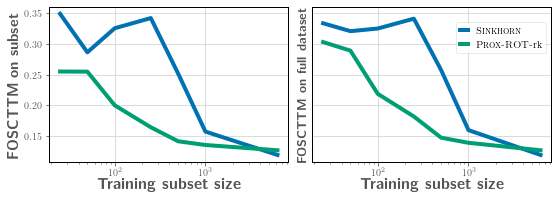

In [9]:
plt.style.use('ggplot')
rc = {"pdf.fonttype": 42, 'text.usetex': True,
      "axes.facecolor": 'w', "grid.color": 'D3D3D3'}
plt.rcParams.update(rc)
plt.style.use('seaborn-colorblind')


fig, ax = plt.subplots(figsize=(9, 6), sharex=True)

width = 4
label_fontsize_x = 16
label_fontsize_y1 = 15
label_fontsize_y2 = 13
ax1 = plt.subplot(2, 2, 1)
ax1.semilogx([25, 50, 100, 250, 500, 1000, 6224], av_best_scores_sinkhorn, linewidth=width)
ax1.semilogx([25, 50, 100, 250, 500, 1000, 6224], av_best_scores_lr, linewidth=width)
ax1.set_ylabel(r"$\textbf{FOSCTTM on subset}$", fontsize=label_fontsize_y1)
ax1.set_xlabel(r"$\textbf{Training subset size}$", fontsize=label_fontsize_x)
ax1.xaxis.labelpad = -.25

ax2 = plt.subplot(2, 2, 2)
ax2.semilogx([25, 50, 100, 250, 500, 1000, 6224], av_best_scores_sinkhorn_test, linewidth=width)
ax2.semilogx([25, 50, 100, 250, 500, 1000, 6224], av_best_scores_lr_test, linewidth=width)
ax2.tick_params(left = False, labelleft = False, top=False, labeltop=False)
ax2.set_ylabel(r"$\textbf{FOSCTTM on full dataset}$", fontsize=label_fontsize_y2)


ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel(r"\textbf{Training subset size}", fontsize=label_fontsize_x)
ax2.xaxis.labelpad = -.25

plt.setp(ax1.spines.values(), linewidth=1, color='black')
plt.setp(ax2.spines.values(), linewidth=1, color='black')

fig.subplots_adjust(wspace=0.1, hspace=0.1)

custom_legend = [r"\textsc{Sinkhorn}", r"\textsc{Prox-ROT-}$\textrm{rk}$"]
plt.legend(custom_legend, ncol=1, columnspacing=0.5, handlelength=0.8, fontsize=10, loc=(0.6, 0.7))
plt.savefig("plots/conv_plot_lr_sink.pdf", bbox_inches='tight', pad_inches=0.0)